# BASICS OF PYTHON | SESSION 5

---


Please follow the next steps over the next 3 hours in order to complete your exam successfully:


1. Download **Spotify Song Attributes** dataset from [HERE](https://www.kaggle.com/datasets/geomack/spotifyclassification).
2. Import dataset in **Google Colab**.
3. Overview dataset and define **one reasonable question**. An important point is to select a question that you will be able to implement statistical tests and plotting.
4. **Preprocess** the dataset to start your analysis.
5. Implement the **statistical models**.
6. **Plot** your results.
7. Set up your **GitHub** account. You can get help from this [LINK](https://docs.aws.amazon.com/codedeploy/latest/userguide/tutorials-github-create-github-account.html).
8. Upload your code and results in a **repository**.
9. Modify the repository title and description then **publish it**.
10. **Share your public repository** [HERE](https://docs.google.com/spreadsheets/d/1bveNOi9efLNgxqxh5uH5xhNG57bQ7DPCnG_sLAX4wmY/edit?usp=sharing).


# 1.&nbsp;Data Importing

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

In [2]:
# connect to the google drive and read the dataset
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Python/spotify song attributes data.csv')
print("data.shape: ", data.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
data.shape:  (2017, 17)


# 2.&nbsp;Data Cleaning (overview)

In [3]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


# 3.&nbsp;Data Cleaning (interpretability)

In [5]:
# Convert and round the 'duration_ms' column to minutes and rename it

data['duration_ms'] = round(data['duration_ms'] / (1000 * 60), 2)
data = data.rename(columns={'duration_ms': 'duration-min'})

data.head()

,Unnamed: 0,acousticness,danceability,duration-min,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,3.41,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,5.45,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,3.10,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,3.32,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,6.55,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [6]:
# rounding acousticness, instrumentalness, speechiness, liveness, loudness

data['acousticness'] = (data['acousticness']).round(3)
data['instrumentalness'] = (data['instrumentalness']).round(3)
data['speechiness'] = (data['speechiness']).round(3)
data['liveness'] = (data['liveness']).round(3)
data['loudness'] = np.round(data['loudness'], decimals=2)

data.head()

,Unnamed: 0,acousticness,danceability,duration-min,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.010,0.833,3.41,0.434,0.022,2,0.165,-8.80,1,0.431,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.199,0.743,5.45,0.359,0.006,1,0.137,-10.40,1,0.079,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.034,0.838,3.10,0.412,0.000,2,0.159,-7.15,1,0.289,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.604,0.494,3.32,0.338,0.510,5,0.092,-15.24,1,0.026,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.180,0.678,6.55,0.561,0.512,5,0.439,-11.65,0,0.069,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


# 4.&nbsp;Data Cleaning (reduction)

In [7]:
# Removeing the time_signature from data

data = data.drop('time_signature', axis=1)
data.head()

,Unnamed: 0,acousticness,danceability,duration-min,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,target,song_title,artist
0,0,0.010,0.833,3.41,0.434,0.022,2,0.165,-8.80,1,0.431,150.062,0.286,1,Mask Off,Future
1,1,0.199,0.743,5.45,0.359,0.006,1,0.137,-10.40,1,0.079,160.083,0.588,1,Redbone,Childish Gambino
2,2,0.034,0.838,3.10,0.412,0.000,2,0.159,-7.15,1,0.289,75.044,0.173,1,Xanny Family,Future
3,3,0.604,0.494,3.32,0.338,0.510,5,0.092,-15.24,1,0.026,86.468,0.230,1,Master Of None,Beach House
4,4,0.180,0.678,6.55,0.561,0.512,5,0.439,-11.65,0,0.069,174.004,0.904,1,Parallel Lines,Junior Boys


# 5.&nbsp;Data Cleaning (noisy data)

In [8]:
# Removeing the songs with zero instrumentalness and without enough liveness

data = data.drop(data[(data['instrumentalness'] == 0) & (data['liveness'] < 0.5)].index)
data.head()


,Unnamed: 0,acousticness,danceability,duration-min,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,target,song_title,artist
0,0,0.010,0.833,3.41,0.434,0.022,2,0.165,-8.80,1,0.431,150.062,0.286,1,Mask Off,Future
1,1,0.199,0.743,5.45,0.359,0.006,1,0.137,-10.40,1,0.079,160.083,0.588,1,Redbone,Childish Gambino
3,3,0.604,0.494,3.32,0.338,0.510,5,0.092,-15.24,1,0.026,86.468,0.230,1,Master Of None,Beach House
4,4,0.180,0.678,6.55,0.561,0.512,5,0.439,-11.65,0,0.069,174.004,0.904,1,Parallel Lines,Junior Boys
7,7,0.020,0.266,5.83,0.348,0.664,10,0.160,-11.61,0,0.037,144.154,0.393,1,Gyöngyhajú lány,Omega


# 6.&nbsp;Data Cleaning (completeness)

In [9]:
# chacking nan values

if data.isna().any().any():
  print("There are nan values")
else:
  print("There are no nan values")

There are no nan values


# 7.&nbsp;Data Exploring


In [10]:
# selecting the rows with mode 1, duration-min more than 4, and danceability more than 0.4

selected_data = data[(data['mode'] == 1) & (data['duration-min'] > 4) & (data['danceability'] > 0.4)]
selected_data.shape

(237, 16)

In [11]:
# sorting the data by liveness with value more than 0.2 in descending order

sorted_data = data[data['liveness'] > 0.2].sort_values(by='liveness', ascending=False)
sorted_data.shape

(338, 16)

In [12]:
# which song_title has highest tempo and which song has highest liveness

max_tempo_song = data[data['tempo'] == data['tempo'].max()]['song_title'].to_string(index=False)
max_liveness_song = data[data['liveness'] == data['liveness'].max()]['song_title'].to_string(index=False)

print(f'highest tempo:', max_tempo_song)
print(f'highest liveness:', max_liveness_song)

highest tempo: Lazuli
highest liveness: dance yrself clean - live at madison square garden


# 8.&nbsp;Data Analysis

In [13]:
# Correlated attributes

correlated_data = data.select_dtypes(include=['number']).corr()
correlated_data

,Unnamed: 0,acousticness,danceability,duration-min,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,target
Unnamed: 0,1.000000,0.219697,-0.177890,-0.064569,-0.112489,0.007368,-0.029812,0.026216,-0.112968,0.025994,-0.057549,-0.060765,-0.238945,-0.873583
acousticness,0.219697,1.000000,-0.266090,0.136518,-0.725804,0.194783,-0.106239,-0.140980,-0.680798,0.068572,-0.174780,-0.196250,-0.258466,-0.223858
danceability,-0.177890,-0.266090,1.000000,0.060789,0.136501,-0.110932,0.063519,-0.131008,0.182549,-0.069047,0.098806,-0.127862,0.500052,0.237218
duration-min,-0.064569,0.136518,0.060789,1.000000,-0.190619,0.210217,0.027327,-0.057685,-0.262051,-0.056024,-0.085400,-0.151219,-0.052549,0.089599
energy,-0.112489,-0.725804,0.136501,-0.190619,1.000000,-0.176074,0.083912,0.236566,0.841534,-0.052294,0.145669,0.223427,0.298881,0.111603
instrumentalness,0.007368,0.194783,-0.110932,0.210217,-0.176074,1.000000,-0.008586,-0.149564,-0.320130,0.024545,-0.196984,-0.021036,-0.221406,0.016069
key,-0.029812,-0.106239,0.063519,0.027327,0.083912,-0.008586,1.000000,0.046024,0.057417,-0.211045,0.005540,0.050302,0.039726,0.036136
liveness,0.026216,-0.140980,-0.131008,-0.057685,0.236566,-0.149564,0.046024,1.000000,0.238716,0.003917,0.193211,0.011719,-0.041270,-0.078675
loudness,-0.112968,-0.680798,0.182549,-0.262051,0.841534,-0.320130,0.057417,0.238716,1.000000,-0.065088,0.164576,0.224331,0.270314,0.091868
mode,0.025994,0.068572,-0.069047,-0.056024,-0.052294,0.024545,-0.211045,0.003917,-0.065088,1.000000,0.018153,-0.033405,-0.051283,-0.041769


In [14]:
# Are the liveness is significantly different between targets 0 and 1

liveness_0 = data[data['target'] == 0]['liveness']
liveness_1 = data[data['target'] == 1]['liveness']

print("var of liveness_0 =", round(np.var(liveness_0), 3))
print("var of liveness_1 =", round(np.var(liveness_1), 3))

def get_ttest(x, y):
  '''
  this function calculate the t-test between two groups
  '''
  result = stats.ttest_ind(a=x, b=y, equal_var=True)
  return result

print(f"P-value: {get_ttest(liveness_0, liveness_1).pvalue:.3f}")

var of liveness_0 = 0.042
var of liveness_1 = 0.036
P-value: 0.017


In [15]:
# Are the tempos significantly different between energies less than .4 and more than 0.6?

tempo_low_energy = data[data['energy'] < 0.4]['tempo']
tempo_high_energy = data[data['energy'] > 0.6]['tempo']

print("var of tempo_low_energy =", round(np.var(tempo_low_energy), 3))
print("var of tempo_high_energy =", round(np.var(tempo_high_energy), 3))

print(f"P-value: {get_ttest(tempo_low_energy, tempo_high_energy).pvalue:.3f}")

var of tempo_low_energy = 1008.71
var of tempo_high_energy = 571.16
P-value: 0.000


In [16]:
# Is there a significant difference in acousticness among songs with keys in the ranges 0–3, 4–7, and 8–11?

key1 = data[(data['key'] >= 0) & (data['key'] <= 3)]['acousticness'] # 0 to 3
key2 = data[(data['key'] >= 4) & (data['key'] <= 7)]['acousticness'] # 4 to 7
key3 = data[(data['key'] >= 8) & (data['key'] <= 11)]['acousticness'] # 8 to 11

def get_anova_test(*groups):
  result = stats.f_oneway(*groups)
  return result

anova_result = get_anova_test(key1, key2, key3)
print(f"F-statistic: {anova_result.statistic:.3f}")
print(f"P-value: {anova_result.pvalue:.3f}")

F-statistic: 5.898
P-value: 0.003


# 9.&nbsp;Data Visualization

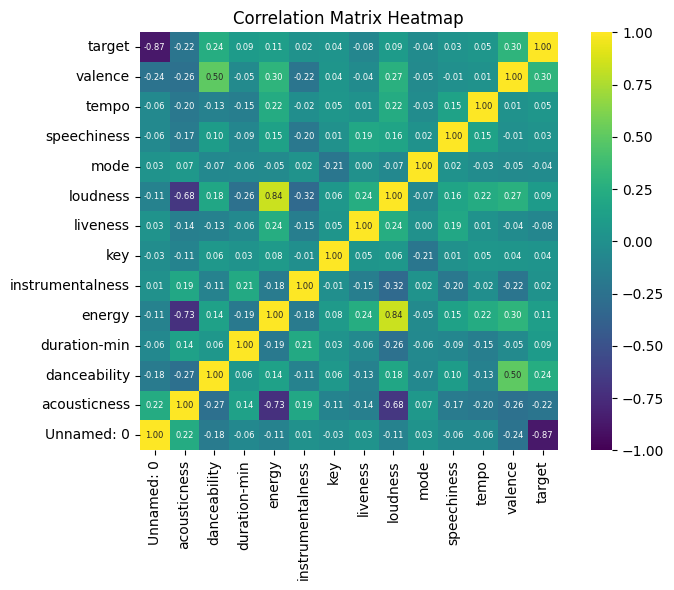

In [30]:
#Correlation heatmap

fig_heatmap, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(correlated_data, annot=True, cmap='viridis', fmt=".2f", square=True,
            annot_kws={"size": 6}, vmin=-1, vmax=1)

plt.title('Correlation Matrix Heatmap', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

<ipython-input-34-61d25888c68c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=key_group, y=acousticness, palette='pastel')


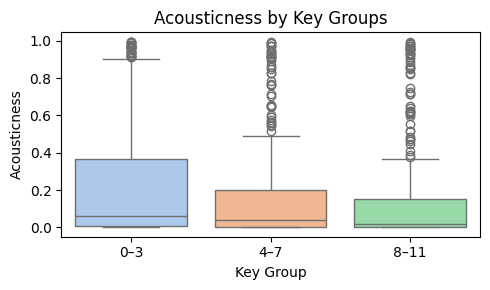

In [34]:
# ploting acousticness among songs with keys in the ranges 0–3, 4–7, and 8–11, in box plot

acousticness = np.concatenate([key1, key2, key3])
key_group = (['0–3'] * len(key1) + ['4–7'] * len(key2) + ['8–11'] * len(key3))

# Create the boxplot
fig_boxplot, ax = plt.subplots(figsize=(5, 3))
sns.boxplot(x=key_group, y=acousticness, palette='pastel')

plt.title('Acousticness by Key Groups')
plt.xlabel('Key Group')
plt.ylabel('Acousticness')
plt.tight_layout()
plt.show()

# 10.&nbsp;Data Exporting

In [35]:
fig_heatmap.savefig('fig_heatmap.svg', dpi=300, bbox_inches='tight')
fig_boxplot.savefig('fig_boxplot.svg', dpi=300, bbox_inches='tight')
data.to_csv('Spotify_test_data_cleaned.csv', header=True, index=True)